# HRF Mark 2.3

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [86]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

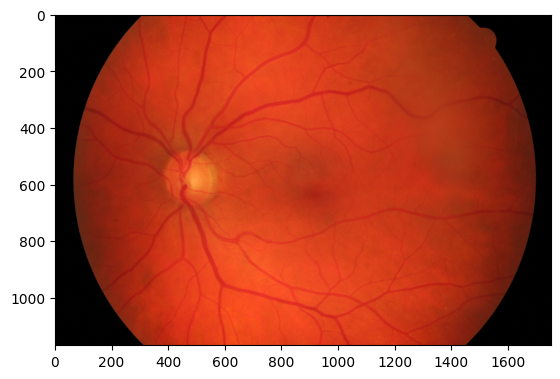

In [183]:
plt.imshow(hrf_res)

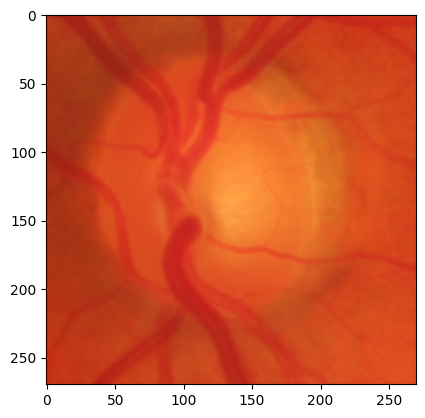

In [184]:
plt.imshow(roi)

In [87]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

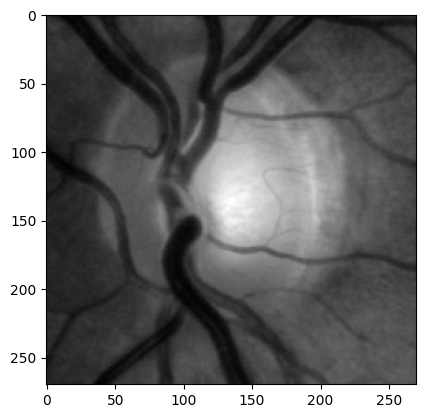

In [88]:
plt.imshow(roi[:,:,1], 'gray')

In [89]:
green = roi[:,:,1].copy()

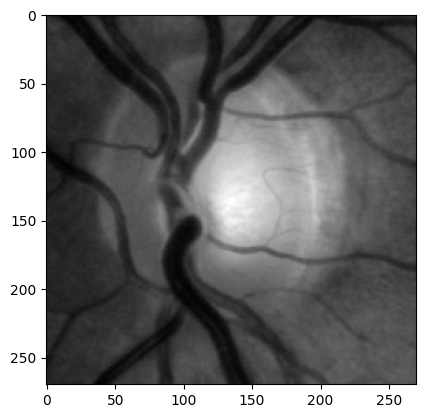

In [90]:
plt.imshow(green, 'gray')

# Hilangkan pembuluh darah

In [91]:
green_inv = 255-green.copy()

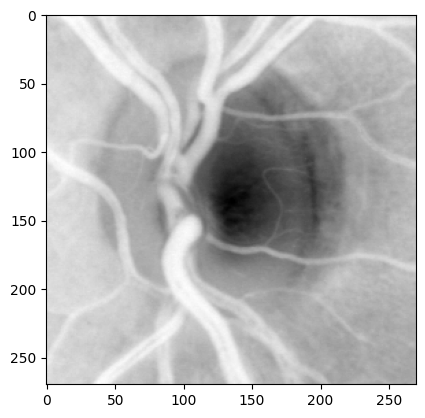

In [92]:
plt.imshow(green_inv, 'gray')

In [93]:
gmc = adjust_gamma(green_inv, 5.0)

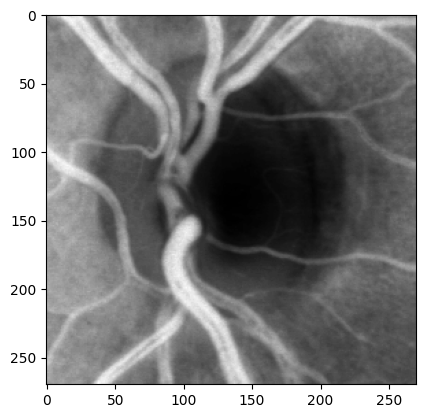

In [94]:
plt.imshow(gmc, 'gray')

In [95]:
clahe = cv2.createCLAHE(3, (8,8))
gmclahe = clahe.apply(gmc.copy())

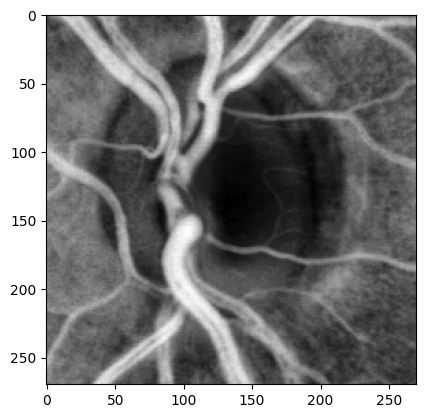

In [96]:
plt.imshow(gmclahe, 'gray')

In [97]:
ret, th = cv2.threshold(gmclahe.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

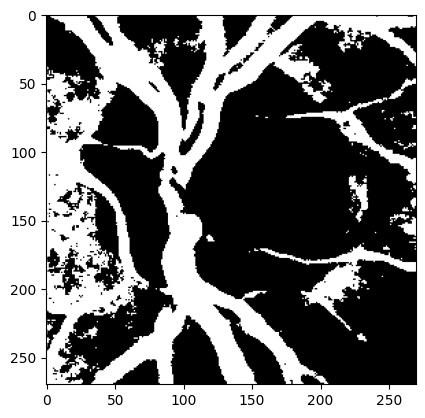

In [98]:
plt.imshow(th, 'gray')

In [102]:
dst = cv2.inpaint(roi.copy(), th, 10,cv2.INPAINT_TELEA)

In [108]:
dst.dtype

dtype('uint8')

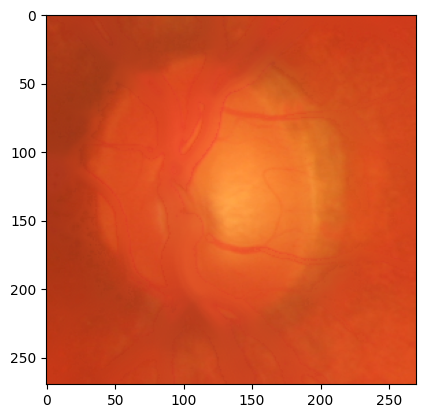

In [103]:
plt.imshow(dst)

In [111]:
dstr = dst[:,:,0].copy()

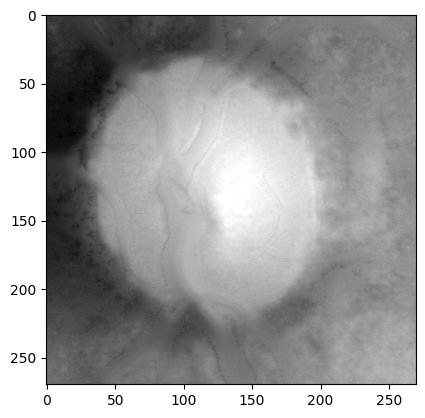

In [113]:
plt.imshow(dstr, 'gray')

In [114]:
clahe = cv2.createCLAHE(2, (8,8))
dstrclahe = clahe.apply(dstr.copy())

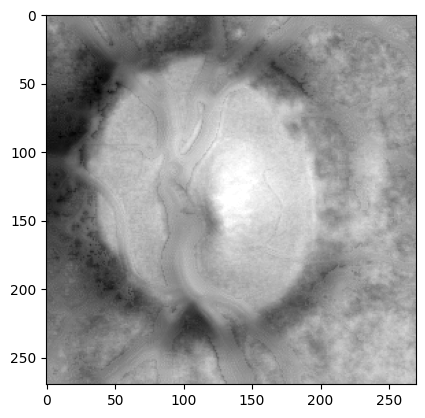

In [116]:
plt.imshow(dstrclahe, 'gray')

In [134]:
dstrgam = adjust_gamma(dstrclahe.copy(), gamma=5)

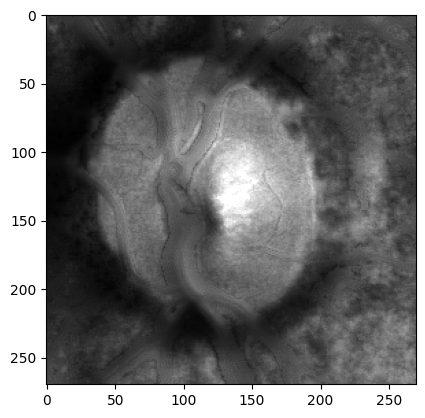

In [135]:
plt.imshow(dstrgam,'gray')

In [136]:
blur = cv2.GaussianBlur(dstrgam.copy(), (19,19), 0)

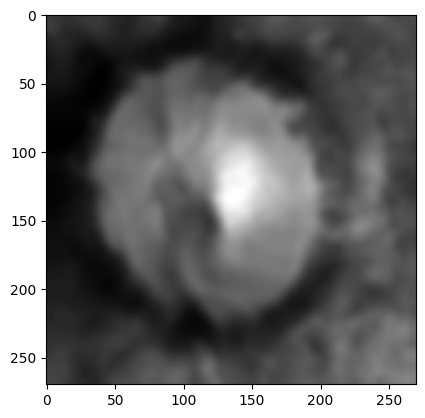

In [137]:
plt.imshow(blur, 'gray')

In [141]:
erosion = cv2.erode(blur.copy(), kernel=np.ones((10, 10), np.uint8))

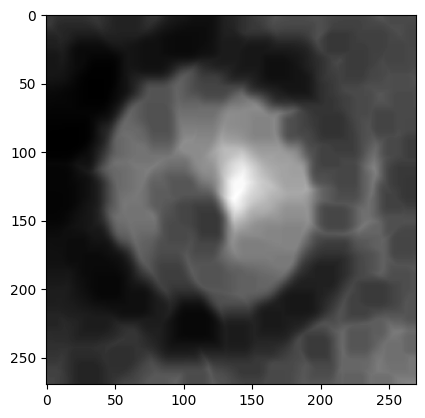

In [143]:
plt.imshow(erosion, 'gray')

In [152]:
dilation = cv2.dilate(erosion.copy(), kernel=np.ones((10, 10), np.uint8))

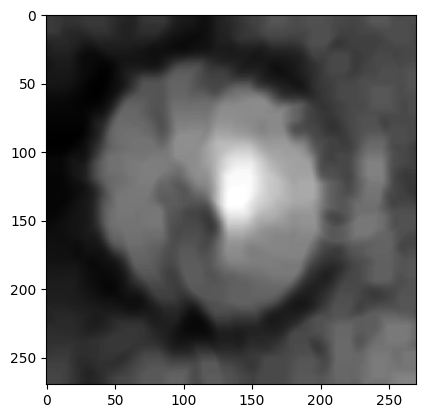

In [153]:
plt.imshow(dilation, 'gray')

In [154]:
ret2, th2 = cv2.threshold(dilation.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

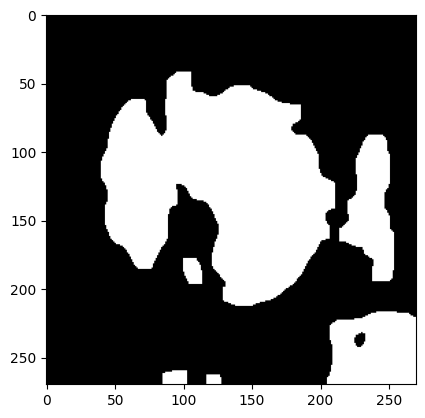

In [155]:
plt.imshow(th2, 'gray')

In [179]:
cont, hcy = cv2.findContours(th2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [180]:
len(cont)

7

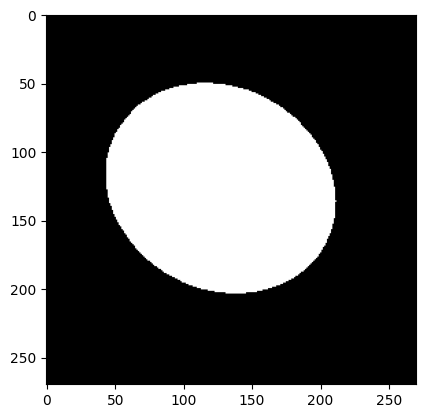

In [181]:
roic = roi.copy()
thhh = th2.copy()
if len(cont) > 1:
    conts = np.array([c.shape[0] for c in cont])
    cont_idx = np.argmax(conts)
    ellipse = cv2.fitEllipse(cont[cont_idx])
else:
    ellipse = cv2.fitEllipse(cont)
    
od = np.zeros_like(thhh, dtype='uint8')
cv2.ellipse(od, ellipse, (255, 255, 255), -1)
cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(od, 'gray')  

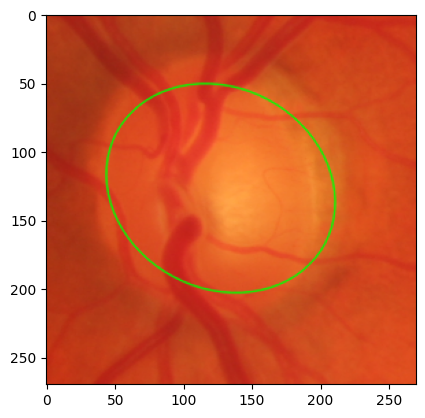

In [182]:
plt.imshow(roic)